In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read the pre processed data
df = pd.read_csv('deltastemr2.csv')

In [7]:
df = df.sort_values(by=['empredst'], ascending=False)
c = list(df.names)

In [8]:
df.head()

,names,stpredem,empredst
108,Zoetis,0.464715,0.903661
1284,Stitch Fix,0.199566,0.858533
1500,Sage Therapeutics,0.001665,0.762376
1472,YPF,0.127412,0.626803
1348,Grifols,0.001599,0.622746


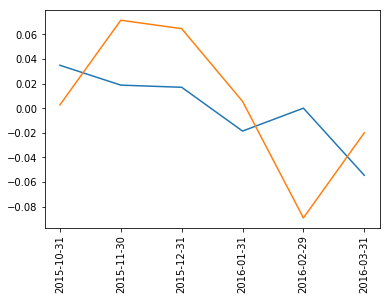

In [9]:
temp = pd.read_csv('deltastem/' + c[0] + '.csv')
temp = temp.set_index('as_of_date')
plt.plot(temp.percentemp)
plt.plot(temp.percentstock)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
linkedin = pd.read_csv('temp_datalab_records_linkedin_company.csv', low_memory=False)

In [11]:
validcomp = df.names

In [12]:
# get the industry category for each company
empredst = {key:np.array([]) for key in linkedin.industry.unique()}
stpredem = {key:np.array([]) for key in linkedin.industry.unique()}
for c in validcomp:
    k = linkedin[linkedin.company_name == c].iloc[0].industry
    # grab r2 for prediction using employee data
    r2 = df[df.names == c].empredst
    x = empredst[k]
    x = np.append(x,r2.values)
    empredst[k] = x
    # grab r2 for prediction using stock data
    r2 = df[df.names == c].stpredem
    x = stpredem[k]
    x = np.append(x,r2.values)
    stpredem[k] = x

In [14]:
countDict = {}
for k,v in stpredem.items():
    if len(v)>0:
        countDict[k] = len(v)

In [15]:
counts = pd.Series(countDict)
counts = counts[counts>50]

In [24]:
k = list(counts.index)
k

['Pharmaceuticals',
 'Information Technology and Services',
 'Oil & Energy',
 'Financial Services',
 'Biotechnology',
 'Telecommunications',
 'Computer Software']

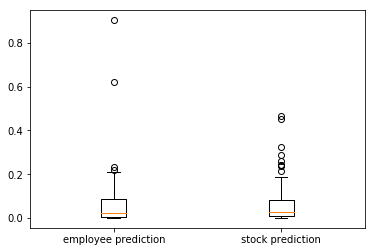

In [37]:
plt.boxplot([empredst[k[0]],stpredem[k[0]]])
plt.xticks([1,2], ['employee prediction', 'stock prediction'])
plt.show()

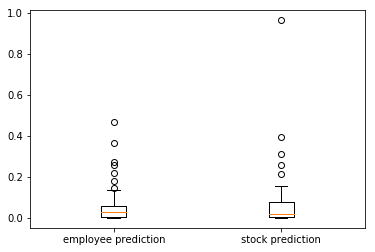

In [35]:
plt.boxplot([empredst[k[1]],stpredem[k[1]]])
plt.xticks([1,2], ['employee prediction', 'stock prediction'])
plt.show()

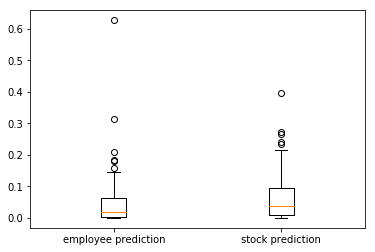

In [29]:
plt.boxplot([empredst[k[2]],stpredem[k[2]]])
plt.xticks([1,2], ['employee prediction', 'stock prediction'])
plt.show()

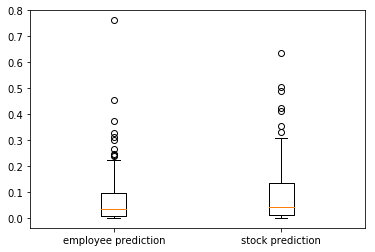

In [30]:
plt.boxplot([empredst[k[4]],stpredem[k[4]]])
plt.xticks([1,2], ['employee prediction', 'stock prediction'])
plt.show()

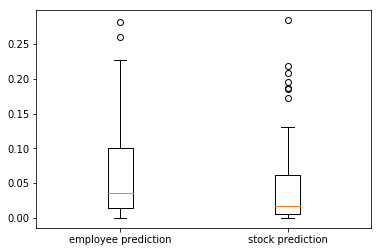

In [31]:
plt.boxplot([empredst[k[5]],stpredem[k[5]]])
plt.xticks([1,2], ['employee prediction', 'stock prediction'])
plt.show()

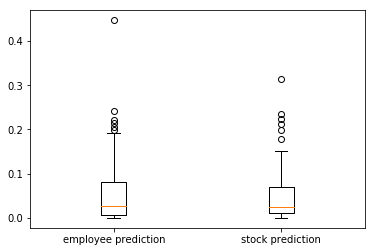

In [32]:
plt.boxplot([empredst[k[6]],stpredem[k[6]]])
plt.xticks([1,2], ['employee prediction', 'stock prediction'])
plt.show()